In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

In [5]:
# Load data from a CSV file using pandas
data = pd.read_csv("311project_data.csv")

# Display the first few rows of the DataFrame
data.head()

,income,recency,wine_num,fruit_num,meat_num,fish_num,sweet_num,gold_num,dis_num,web_num,...,visit_num,complain,accept_last,age,total_spent,children,family_size,is_parent,education,total_accepted
0,58138.0,58,635,88,546,172,88,88,3,8,...,7,0,1,66,1617,0,1,0,Graduate,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,5,0,0,69,27,2,3,1,Graduate,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,4,0,0,58,776,0,2,0,Graduate,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,6,0,0,39,53,1,3,1,Graduate,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,5,0,0,42,422,1,3,1,Postgraduate,0


In [6]:
# Define a function to categorize columns into categorical and numerical based on unique values
def col_names(dataframe, cat_th=10, car_th=200):

    # Get columns with data types "category," "bool," or "object" as categorical
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "bool", "object"]]

    # Identify numerical columns with a unique value count less than the specified threshold
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    # Add the numerical-but-categorical columns to the categorical columns
    cat_cols = cat_cols + num_but_cat

    # Get columns with numerical data types
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    # Exclude the numerical-but-categorical columns from the numerical columns
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols

# Call the function to categorize columns in the 'data' DataFrame
cat_cols, num_cols = col_names(data)

In [7]:
# Load the data
data = pd.read_csv("311project_data.csv")

# Identify numerical and categorical columns
cat_cols, num_cols = col_names(data)

# Separate features into numerical and categorical
X_num = data[num_cols]
X_cat = data[cat_cols]

# Standardize the numerical features
scaler = StandardScaler()
X_num_standardized = scaler.fit_transform(X_num)

# Apply PCA to numerical features
pca_num = PCA(n_components=5)
X_num_pca = pca_num.fit_transform(X_num_standardized)

# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_cat_encoded = encoder.fit_transform(X_cat)

# Combine numerical PCA components and categorical features
X_combined = np.concatenate([X_num_pca, X_cat_encoded], axis=1)

# Create a DataFrame with the combined features
pca_columns = [f"PC{i + 1}" for i in range(5)]
encoded_cat_columns = encoder.get_feature_names_out(X_cat.columns)
combined_columns = np.concatenate([pca_columns, encoded_cat_columns])
df_combined = pd.DataFrame(data=X_combined, columns=combined_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
encoded_cat_columns = encoder.get_feature_names_out(X_cat.columns)
encoded_cat_columns

array(['education_Postgraduate', 'education_Undergraduate', 'complain_1',
       'accept_last_1', 'children_1', 'children_2', 'children_3',
       'family_size_2', 'family_size_3', 'family_size_4', 'family_size_5',
       'is_parent_1', 'total_accepted_1', 'total_accepted_2',
       'total_accepted_3', 'total_accepted_4'], dtype=object)

In [9]:
combined_columns = np.concatenate([pca_columns, encoded_cat_columns])
combined_columns

array(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'education_Postgraduate',
       'education_Undergraduate', 'complain_1', 'accept_last_1',
       'children_1', 'children_2', 'children_3', 'family_size_2',
       'family_size_3', 'family_size_4', 'family_size_5', 'is_parent_1',
       'total_accepted_1', 'total_accepted_2', 'total_accepted_3',
       'total_accepted_4'], dtype=object)

In [10]:
df_combined = pd.DataFrame(data=X_combined, columns=combined_columns)
df_combined

,PC1,PC2,PC3,PC4,PC5,education_Postgraduate,education_Undergraduate,complain_1,accept_last_1,children_1,...,children_3,family_size_2,family_size_3,family_size_4,family_size_5,is_parent_1,total_accepted_1,total_accepted_2,total_accepted_3,total_accepted_4
0,4.055673,0.654288,0.664708,0.555530,-1.128969,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.259296,-0.599046,-1.368325,-0.665898,-0.658358,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.701498,0.149719,-0.067143,-0.998863,-0.499074,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.549331,-0.713911,1.007711,-0.592429,0.512366,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.114561,0.474987,0.584480,1.698433,0.457282,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.874985,1.214381,1.396543,0.351934,-1.780615,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,-0.704575,3.099206,-1.565598,-0.083151,-0.328926,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2237,1.429576,-0.169163,-0.147731,1.323576,1.854598,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2238,1.976399,0.290078,-0.753614,-1.674386,-0.461122,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# Print the explained variance ratio for each principal component
print("Explained Variance Ratio (Numerical Features):")
print(pca_num.explained_variance_ratio_)

Explained Variance Ratio (Numerical Features):
[0.44530996 0.10527137 0.07199668 0.06655126 0.05550696]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

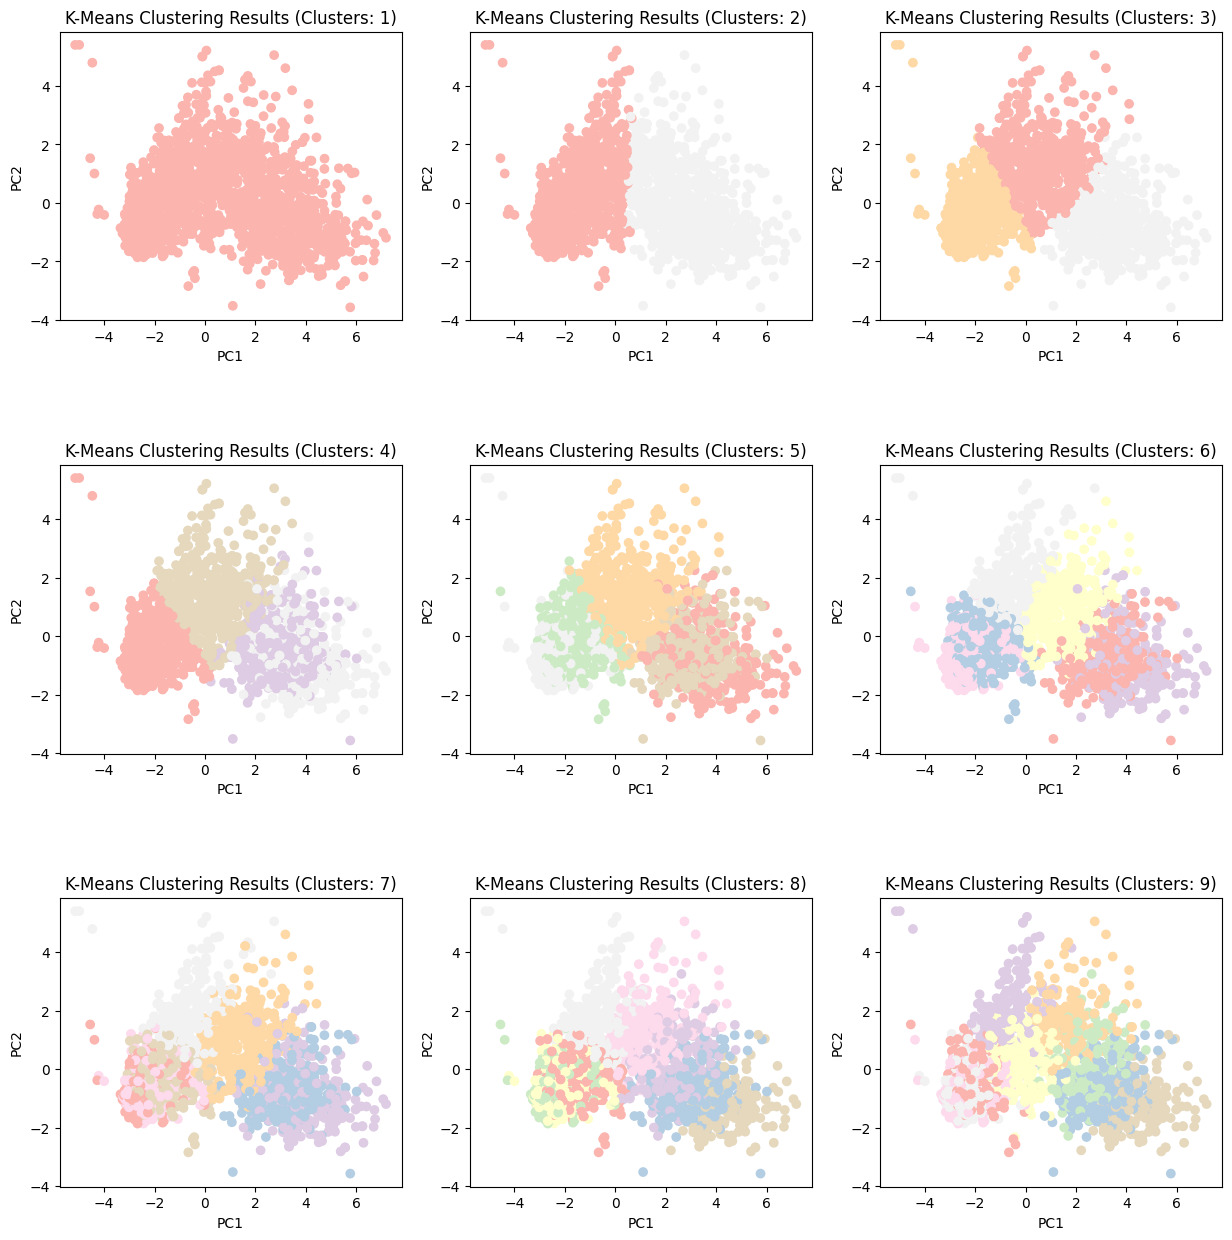

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i in range(1, 10):
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_combined)

    # Add cluster labels to the DataFrame
    df_combined["Cluster"] = labels

    # Visualize the clusters in a 2D space (using the first two principal components)
    row = (i - 1) // 3
    col = (i - 1) % 3
    ax = axs[row, col]
    ax.scatter(df_combined["PC1"], df_combined["PC2"], c=df_combined["Cluster"], cmap="Pastel1")
    ax.set_title(f"K-Means Clustering Results (Clusters: {i})")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.show()

In [13]:
# Apply K-Means clustering with n_clusters=4
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_combined)

# Add cluster labels to the DataFrame
df_combined["Cluster"] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df_combined.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'education_Postgraduate',
       'education_Undergraduate', 'complain_1', 'accept_last_1', 'children_1',
       'children_2', 'children_3', 'family_size_2', 'family_size_3',
       'family_size_4', 'family_size_5', 'is_parent_1', 'total_accepted_1',
       'total_accepted_2', 'total_accepted_3', 'total_accepted_4', 'Cluster'],
      dtype='object')

### Feature Importance Analysis
This code will compute the means of features for each cluster after performing K-means clustering. It's essential to inspect these means to understand how they vary across different clusters, indicating the influence of each feature in forming these clusters.

In [15]:
# Create a copy of the DataFrame before adding cluster labels
df_copy = df_combined.copy()


# Calculate and compare means of features across clusters
cluster_means = df_copy.groupby("Cluster").mean()

# Display the means of features for each cluster
print(cluster_means)

              PC1       PC2       PC3       PC4       PC5  \
Cluster                                                     
0       -2.303618 -0.451482  0.028680  0.042079 -0.025909   
1        2.914929 -0.330556 -0.685044 -0.076018  0.669687   
2        0.280891  1.479990 -0.088524 -0.099635  0.022149   
3        3.918274 -0.793604  0.985288  0.142591 -0.845792   

         education_Postgraduate  education_Undergraduate  complain_1  \
Cluster                                                                
0                      0.347276                 0.160506    0.011673   
1                      0.488127                 0.065963    0.013193   
2                      0.472727                 0.060000    0.007273   
3                      0.190813                 0.120141    0.000000   

         accept_last_1  children_1  ...  children_3  family_size_2  \
Cluster                             ...                              
0             0.084630    0.560311  ...    0.035019       0.

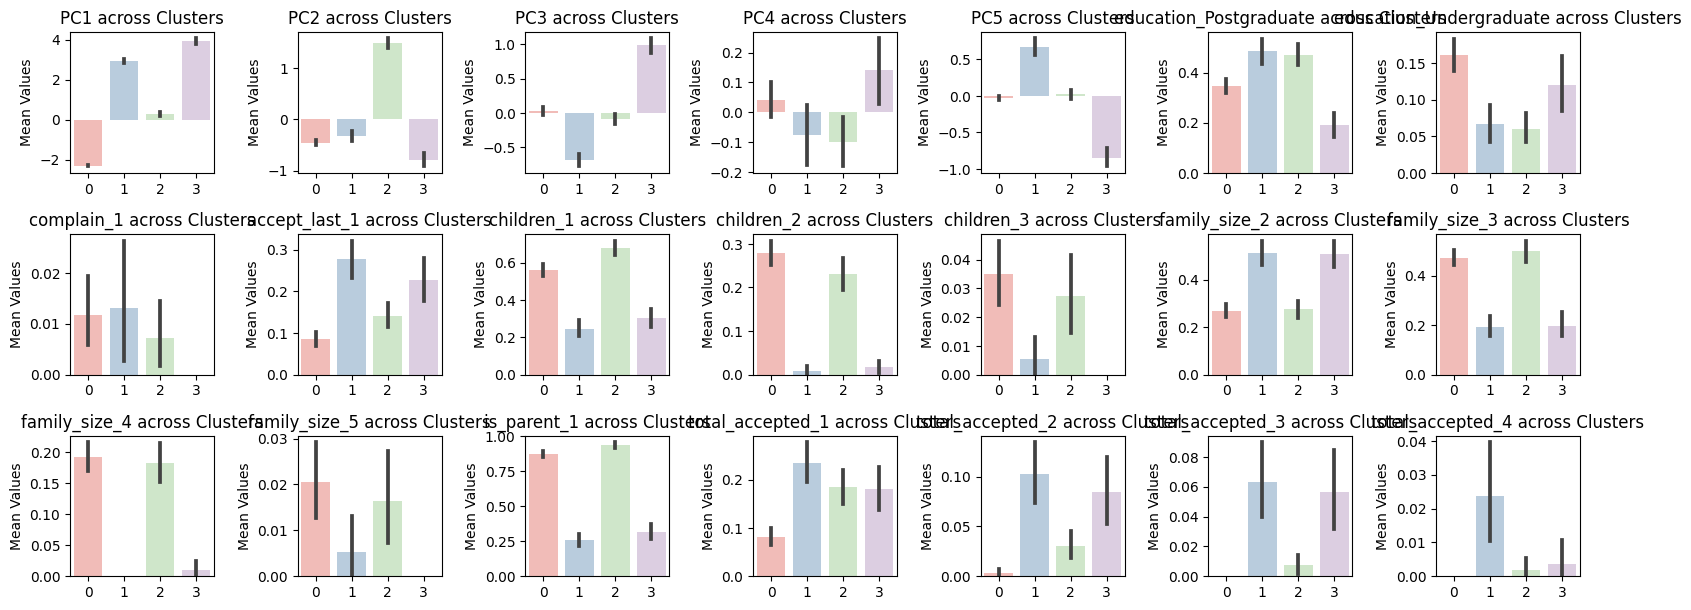

In [16]:

# Set the figure size
plt.figure(figsize=(16, 10))

# Plotting each feature's mean values across clusters using a bar plot
for feature in cluster_means.columns:
    plt.subplot(5, 7, list(cluster_means.columns).index(feature) + 1)
    sns.barplot(data=df_copy, x='Cluster', y=feature, palette='Pastel1')
    plt.title(f"{feature} across Clusters")
    plt.xlabel('')
    plt.ylabel('Mean Values')

plt.tight_layout()
plt.show()

In [17]:
features_for_clustering = ['income', 'recency','total_spent', 'age']
n_clusters = 3  # You can adjust this based on your needs

# Fit Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=n_clusters)
data_cp=data.copy()
data_cp['cluster'] = clustering.fit_predict(data_cp[features_for_clustering])

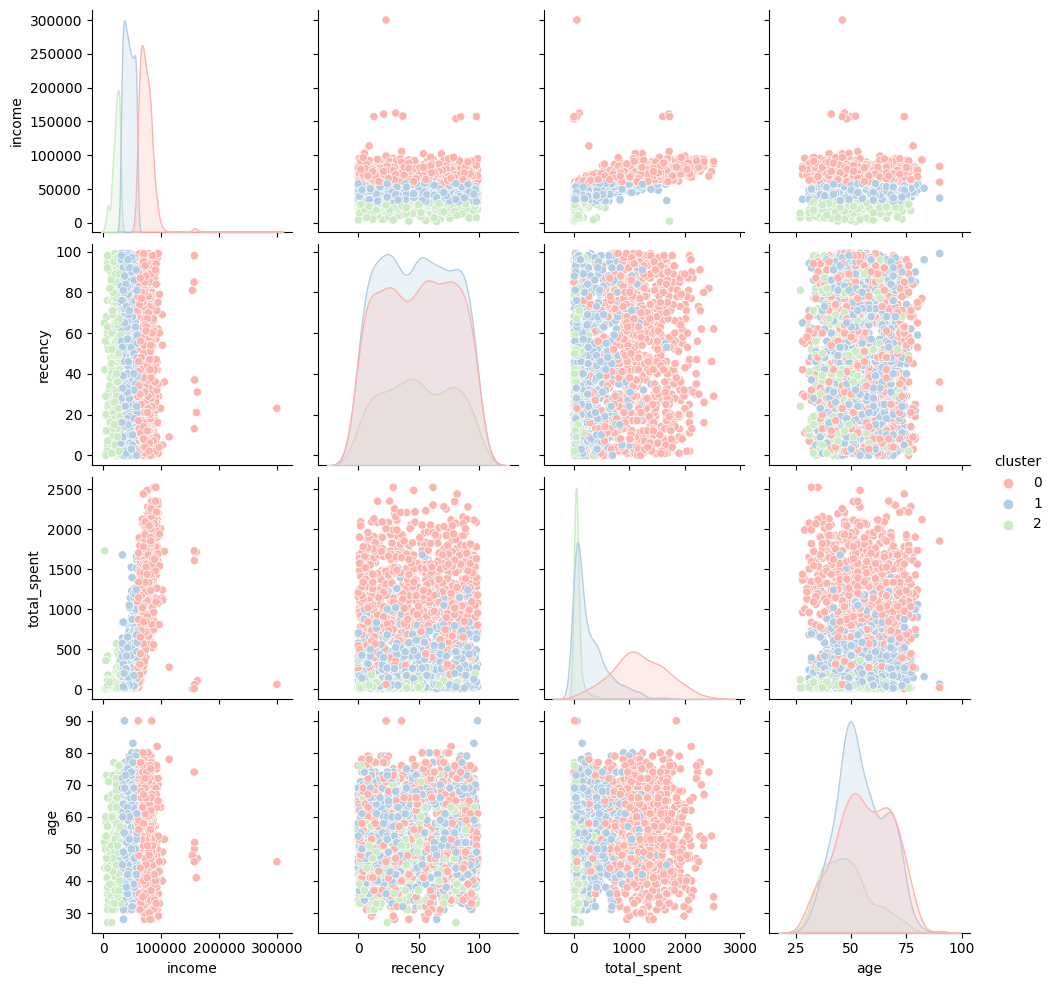

In [18]:
# Pairplot of Clusters
sns.pairplot(data_cp, vars=features_for_clustering, hue='cluster', palette='Pastel1')
plt.show()

<ipython-input-19-ee0df58b0e71>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data_cp.groupby('cluster').mean()


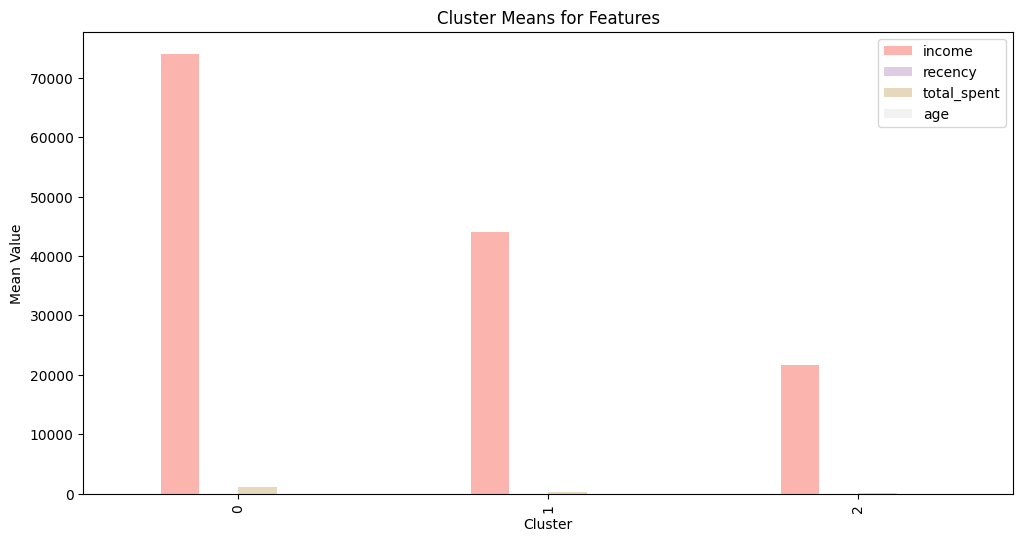

In [19]:
# Cluster Means Plot
cluster_means = data_cp.groupby('cluster').mean()
cluster_means[features_for_clustering].plot(kind='bar', figsize=(12, 6), colormap='Pastel1')
plt.title('Cluster Means for Features')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.show()

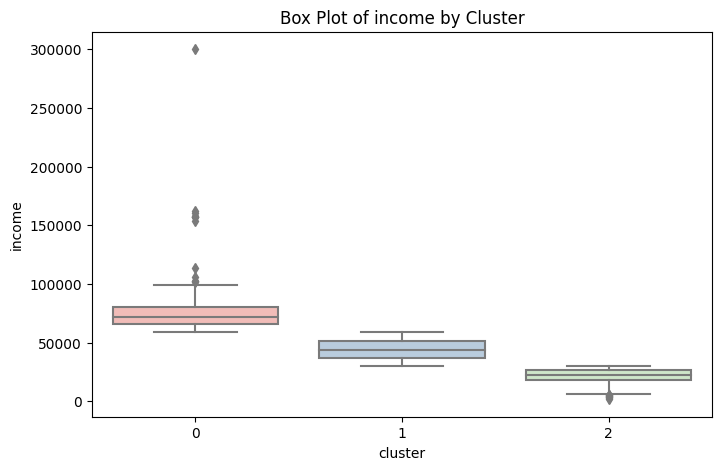

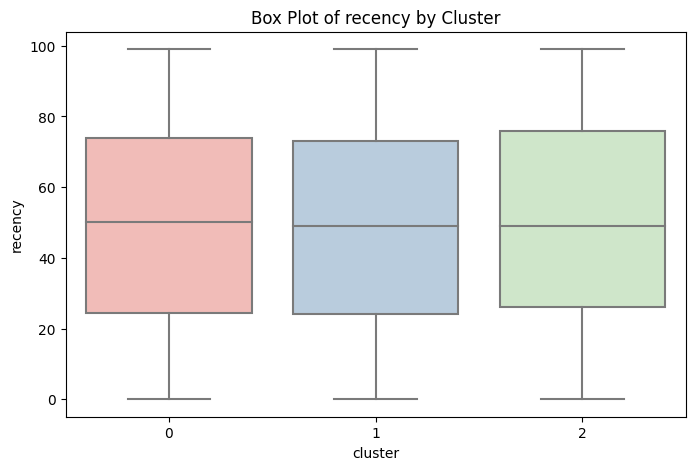

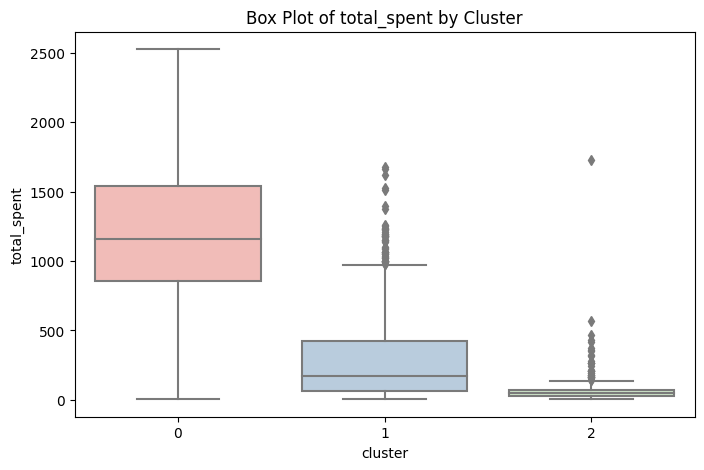

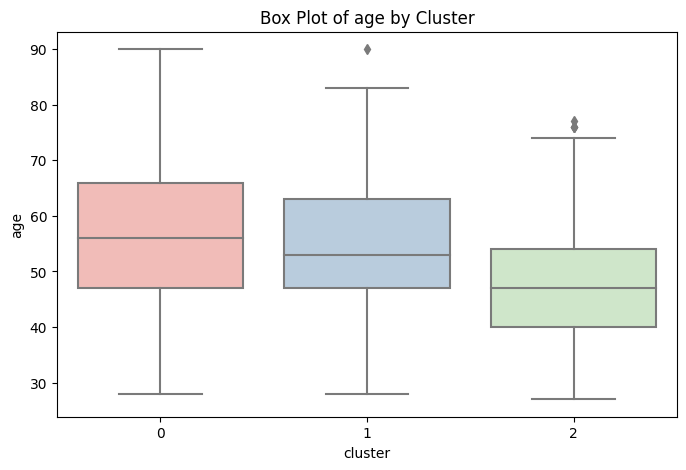

In [20]:
# Box Plots for Features by Cluster
for feature in features_for_clustering:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='cluster', y=feature, data=data_cp, palette='Pastel1')
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.show()